<a href="https://colab.research.google.com/github/Sagalo04/Interpolation/blob/master/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpolación y Transformación** #



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/Interpolation/'
os.chdir(path)
!pwd
# graficar imagenes estadisticas en el notebook

%matplotlib inline

/content/drive/My Drive/PDI/Interpolation


In [0]:
def displayGray3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(3,3))
  plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def readRGB(imgPath):
  img=cv2.imread(imgPath)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

# **Interpolación Nearest Neighbour**#

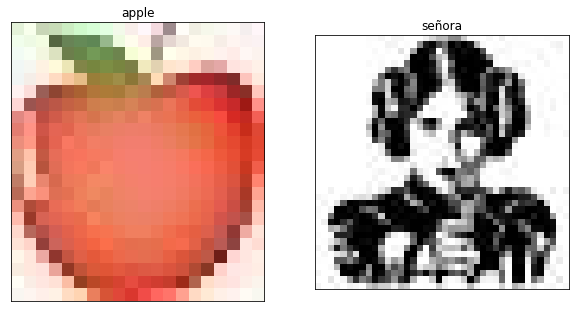

In [4]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA,None,fx = 5,fy=5,interpolation = cv2.INTER_NEAREST)
near_imgM = cv2.resize(imgM,None,fx = 5,fy=5,interpolation = cv2.INTER_NEAREST)
displayColor2(near_imgA,near_imgM,'apple','señora')

# **Interpolación BiLinear**

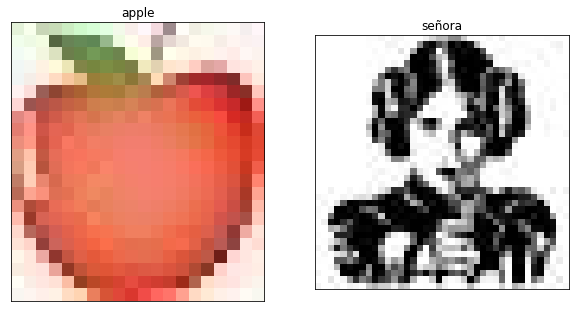

In [5]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bili_imgA = cv2.resize(imgA,None,fx = 5,fy=5,interpolation = cv2.INTER_LINEAR)
bili_imgM = cv2.resize(imgM,None,fx = 5,fy=5,interpolation = cv2.INTER_LINEAR)
displayColor2(near_imgA,near_imgM,'apple','señora')

# **Interpolación BiCubic**

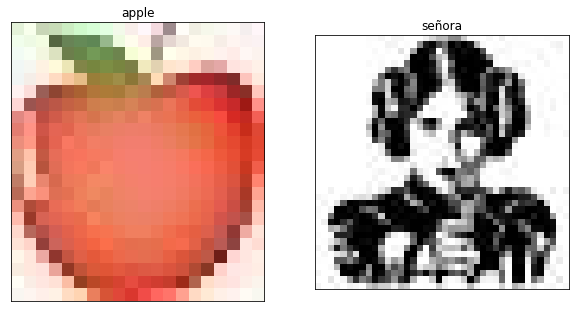

In [6]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bicu_imgA = cv2.resize(imgA,None,fx = 5,fy=5,interpolation = cv2.INTER_CUBIC)
bicu_imgM = cv2.resize(imgM,None,fx = 5,fy=5,interpolation = cv2.INTER_CUBIC)
displayColor2(near_imgA,near_imgM,'apple','señora')

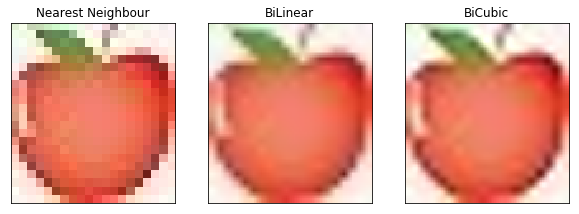

In [7]:
displayColor3(near_imgA,bili_imgA,bicu_imgA,'Nearest Neighbour','BiLinear','BiCubic')

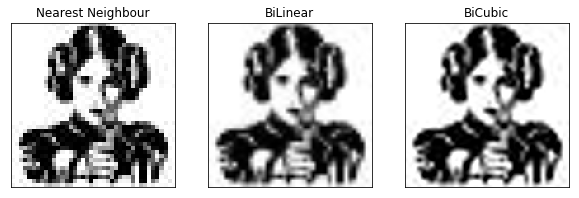

In [8]:
displayColor3(near_imgM,bili_imgM,bicu_imgM,'Nearest Neighbour','BiLinear','BiCubic')

#**Otros Algoritmos de Interpolación***#

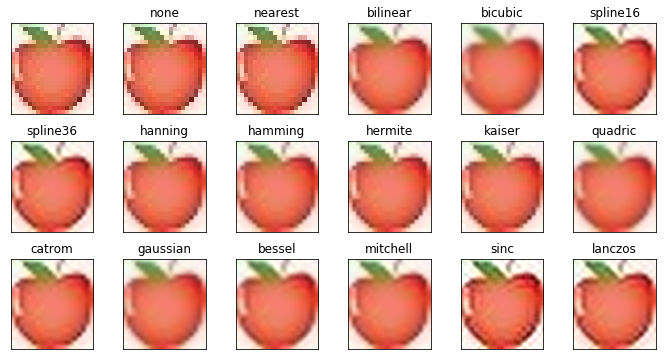

In [9]:
methods = [None, 'none','nearest','bilinear','bicubic','spline16',
          'spline36','hanning','hamming','hermite','kaiser','quadric',
           'catrom','gaussian','bessel','mitchell','sinc','lanczos']

grid=imgA

fig,axes = plt.subplots(3, 6, figsize=(12,6),
                       subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3,wspace=0.05)

for ax, interp_method in zip(axes.flat,methods):
    ax.imshow(grid,interpolation=interp_method)
    ax.set_title(interp_method)
  
plt.show()

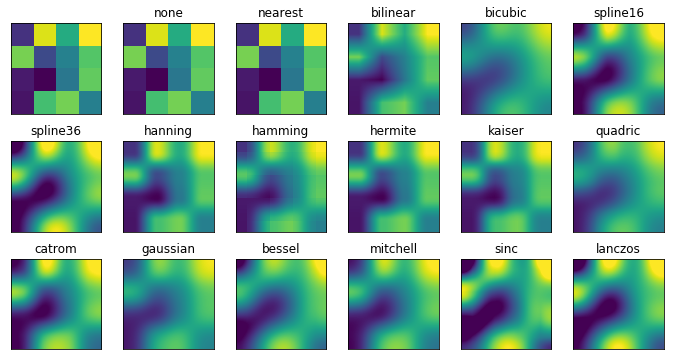

In [31]:
methods = [None, 'none','nearest','bilinear','bicubic','spline16',
          'spline36','hanning','hamming','hermite','kaiser','quadric',
           'catrom','gaussian','bessel','mitchell','sinc','lanczos']

grid=np.random.rand(4,4)
#grid=imgA

fig,axes = plt.subplots(3, 6, figsize=(12,6),
                       subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3,wspace=0.05)

for ax, interp_method in zip(axes.flat,methods):
    ax.imshow(grid,interpolation=interp_method)
    ax.set_title(interp_method)
  
plt.show()

# **Negativo de una imagen a Color**

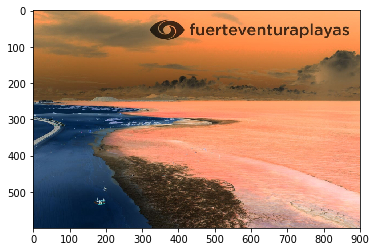

In [27]:
from PIL import Image

foto = Image.open('playa.jpg')

datos = list(foto.getdata())

datos_invertidos = [(255-datos[x][0],255-datos[x][1],255-datos[x][2]) for x in range(len(datos)) ]
                     
imagen_invertida = Image.new('RGB',foto.size)
                     
imagen_invertida.putdata(datos_invertidos)
                     
#imagen_invertida.save('playa2.jpg')
                     
plt.imshow(np.asarray(imagen_invertida))
                

# **Negativo de una imagen en escala de grises**

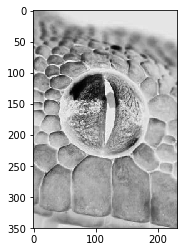

In [38]:
from PIL import Image

foto = Image.open('ojo.jpg')

datos = foto.getdata()

datos_invertidos = [255 - x for x in datos ]
                     
imagen_invertida = Image.new('L',foto.size)
                     
imagen_invertida.putdata(datos_invertidos)
                     
#imagen_invertida.save('playa2.jpg')
                     
plt.imshow(np.asarray(imagen_invertida),cmap='gray')

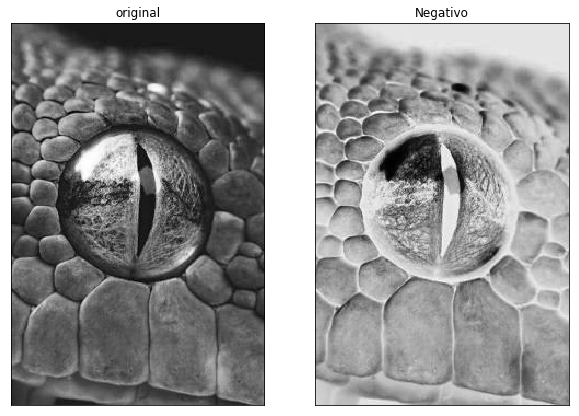

In [66]:
def negative(l):
  #Cargar imagen
  img = cv2.imread('ojo.jpg',cv2.IMREAD_GRAYSCALE)
  rows,columns = img.shape
  img2=np.zeros((rows,columns),dtype=np.uint8)
  for x in range(rows):
    for y in range(columns):
      img2[x,y]=(l-1)-img[x,y]
      
  displayGray2(img,img2,'original','Negativo')
  return

negative(256)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


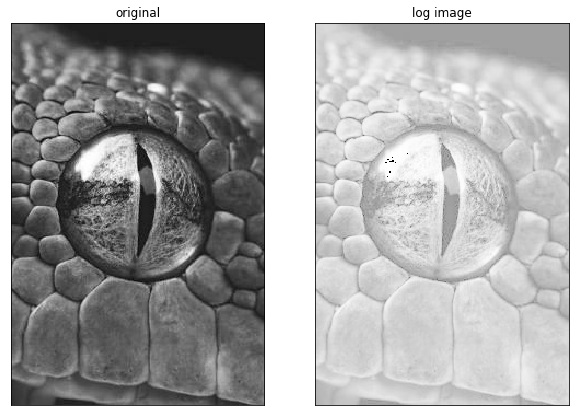

In [69]:
import cv2
import numpy as np
#load
img = cv2.imread('ojo.jpg')
#apply log Transform
img_log=(np.log(img+1)/(np.log(1+np.max(img))))*255
#Specify the data type
img_log=np.array(img_log,dtype=np.uint8)
#display
displayGray2(img,img_log,'original','log image')